In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from  sklearn import metrics
import warnings

Data Collection & Processing

In [7]:
# Loading csv data to a Pandas DataFrame
gold_data = pd.read_csv(r'C:\Users\TejalPrathmesh\OneDrive\Desktop\ML Project\gld_price_data.csv')


In [9]:
#First 5 rows of data
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [10]:
# Last 5 rows of data
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [11]:
# Numbers of Rows & Column in dataframe
gold_data.shape

(2290, 6)

In [12]:
# Getting Some Basic Informtion about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [13]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [14]:
# getting the statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


   Constructing a heatmap to Understand the correlation
   

In [25]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'], format='mixed')


In [26]:
correlation = gold_data.corr()


<Axes: >

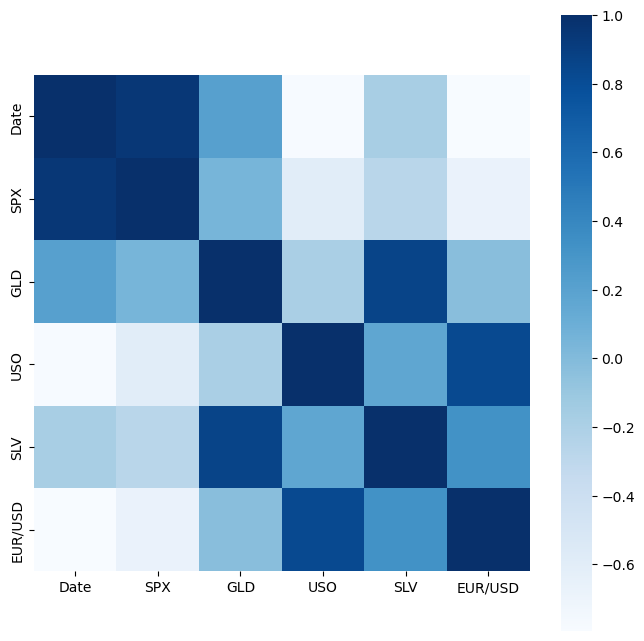

In [28]:
plt.figure(figsize =(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot_kws={'size':8},cmap='Blues')

In [29]:
# correlation values of GLD 
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\TejalPrathmesh\AppData\Local\Temp\ipykernel_20580\1118267403.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')
C:\Users\TejalPrathmesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


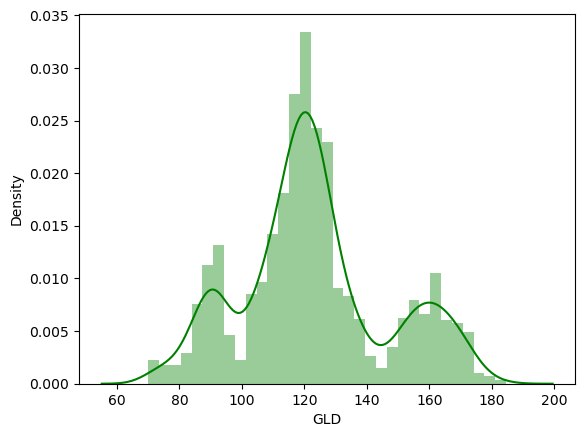

In [32]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')
warnings.filterwarnings('ignore')


Splitting the Features and Target

In [33]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y= gold_data['GLD']

Splitting into Training & Testing data


In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state =2)

In [35]:
# Model Evaluation
regressor = RandomForestRegressor(n_estimators=100)

In [37]:
# training the model by training data set
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [39]:
# Prediction on test data
test_data_prediction = regressor.predict(X_test)


In [40]:
test_data_prediction

array([168.38119934,  82.38469979, 115.83890015, 127.79490071,
       120.66420112, 154.68419718, 150.27699824, 126.07560048,
       117.40509889, 125.93000113, 116.56900109, 172.10340057,
       141.41619848, 167.8239987 , 115.25320017, 117.78210068,
       139.8278029 , 170.26940102, 159.8360019 , 157.36900027,
       155.01839959, 125.27920035, 176.19779928, 157.62590425,
       125.21070029,  93.61399965,  77.11890015, 120.58369979,
       119.15629964, 167.61719928,  88.32290038, 125.00969983,
        91.24590107, 117.85390014, 121.05579943, 136.40220101,
       115.34020127, 115.13890088, 147.15279972, 107.32680073,
       104.13480252,  87.27509823, 126.52370029, 118.01390007,
       155.22980014, 119.54669992, 108.44359969, 108.2170981 ,
        93.1715005 , 127.1684976 ,  74.96890021, 113.7209988 ,
       121.31370006, 111.34449913, 118.96019914, 120.71569957,
       159.18499964, 169.85140139, 147.09739715,  86.06779886,
        94.50800031,  86.77409856,  90.37980006, 118.92

In [41]:
# R SQUARE ERROR
error_score = metrics.r2_score(Y_test,test_data_prediction)
print('R square error = ',error_score)

R square error =  0.9896426917159553


Compare the Actual Values and Predicted Values in a Plot

In [42]:
Y_test = list(Y_test)

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylabe'

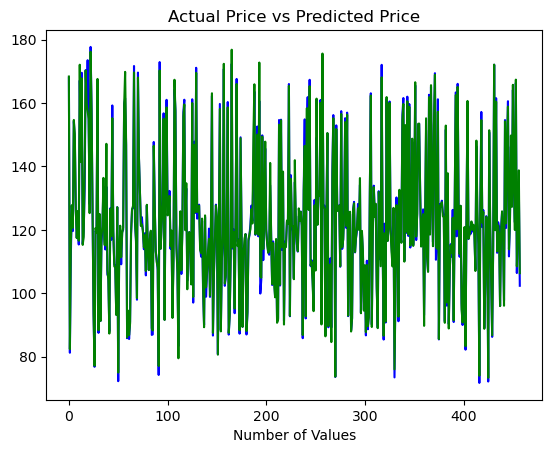

In [43]:
plt.plot(Y_test,color='blue',label = 'Actual Values')
plt.plot(test_data_prediction, color='green',label ='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()